In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import pandas_profiling as pp
from deep_translator import GoogleTranslator
from geopy.geocoders import Nominatim
import numpy as np


In [2]:
target = pd.read_excel('Target Data.xlsx')
target.head()

,carType,color,condition,currency,drive,city,country,make,manufacture_year,mileage,mileage_unit,model,model_variant,price_on_request,type,zip,manufacture_month,fuel_consumption_unit
0,Coupé,Other,Used,EUR,LHD,Monterey,US,AAR,1969,12450.0,NaN,Eagle,Mk 5 F5000 #7,True,car,NaN,NaN,NaN
1,Coupé,Other,Used,EUR,LHD,Monterey,US,AAR,1969,29075.0,NaN,Eagle,Santa Ana Indianapolis #42,True,car,NaN,NaN,NaN
2,Coupé,Other,Used,EUR,LHD,Monterey,US,AAR,1966,49031.0,NaN,Eagle,Indianapolis #31,True,car,NaN,NaN,NaN
3,Convertible / Roadster,Red,Used,EUR,LHD,Peuerbach,AT,Abarth,2011,3894.0,kilometer,695,Tributo Ferrari *Rosso Corsa*11.000 KM*,False,car,NaN,12.0,NaN
4,Coupé,Red,Used,EUR,LHD,Sattledt,AT,Abarth,2009,13262.0,kilometer,500,Abarth 500 Kit esseesse 36 Monate Garantie,False,car,NaN,7.0,NaN


In [3]:
target.shape

(7252, 18)

### Data Profiling

In [4]:
data = pd.read_json('supplier_car.json', lines=True, encoding='utf-8')
data.head()


,ID,MakeText,TypeName,TypeNameFull,ModelText,ModelTypeText,Attribute Names,Attribute Values,entity_id
0,976,MERCEDES-BENZ,McLaren,MERCEDES-BENZ SLR McLaren,SLR,SLR McLaren,Seats,2,0001fda6-192b-46a8-bc08-0e833f904eed
1,1059,MERCEDES-BENZ,ML 350 Inspiration,MERCEDES-BENZ ML 350 Inspiration,ML 350,ML 350 Inspiration,Hp,235,00107c2d-0071-4475-88f0-810133638b7e
2,524,AUDI,S6 Avant quattro 4.2,AUDI S6 Avant quattro 4.2,S6,S6 Avant quattro 4.2,FuelTypeText,Benzin,00126794-a8ef-48fe-93d6-43cfc69fbfb6
3,608,SAAB,9-3 2.0i-16 TS Aero,SAAB 9-3 2.0i-16 TS Aero,9-3,9-3 2.0i-16 TS Aero,Ccm,1985,00182529-1bf7-4f93-89fa-2e8e634b2c9d
4,726,PORSCHE,911 Turbo Cabrio,PORSCHE 911 Turbo Cabrio,911,911 Turbo Cabrio,BodyColorText,schwarz mét.,002d30c2-43f6-4905-868f-160dbc445c56


In [5]:
data['Attribute Names'].unique()

array(['Seats', 'Hp', 'FuelTypeText', 'Ccm', 'BodyColorText',
       'ConsumptionTotalText', 'Doors', 'Co2EmissionText',
       'TransmissionTypeText', 'FirstRegYear', 'Properties',
       'ConditionTypeText', 'Km', 'DriveTypeText', 'InteriorColorText',
       'ConsumptionRatingText', 'FirstRegMonth', 'City', 'BodyTypeText'],
      dtype=object)

In [6]:
data['Attribute Values'].unique()

array(['2', '235', 'Benzin', ..., '74400', '38400', '698'], dtype=object)

In [7]:
data.shape

(21906, 9)

In [8]:
data.dtypes

ID                   int64
MakeText            object
TypeName            object
TypeNameFull        object
ModelText           object
ModelTypeText       object
Attribute Names     object
Attribute Values    object
entity_id           object
dtype: object

In [9]:
cat_vars = data.select_dtypes(include='object')
data[cat_vars.columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
data.dtypes

ID                     int64
MakeText            category
TypeName            category
TypeNameFull        category
ModelText           category
ModelTypeText       category
Attribute Names     category
Attribute Values    category
entity_id           category
dtype: object

#### Missing values

In [10]:
data.isna().sum()

ID                    0
MakeText              0
TypeName              0
TypeNameFull          0
ModelText           949
ModelTypeText         0
Attribute Names       0
Attribute Values      0
entity_id             0
dtype: int64

<AxesSubplot:xlabel='index'>

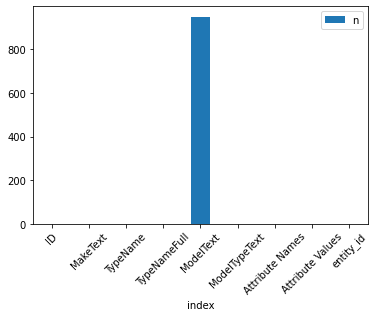

In [11]:
data.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

### Data distribution


#### Numeric variables

In [12]:
register_matplotlib_converters()
data.describe()

,ID
count,21906.000000
mean,576.988725
std,332.853316
min,1.000000
25%,289.000000
50%,577.000000
75%,865.000000
max,1153.000000


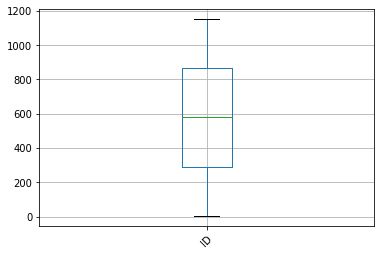

In [13]:
data.boxplot(rot=45)
plt.show()

In [14]:
#pp.ProfileReport(data)

### Pre processing

In [15]:
target_cols_aux = data['Attribute Names'].unique()
target_cols = ['MakeText','TypeName','TypeNameFull','ModelText','ModelTypeText']

for x in target_cols_aux:
    target_cols.append(x)
target_cols

['MakeText',
 'TypeName',
 'TypeNameFull',
 'ModelText',
 'ModelTypeText',
 'Seats',
 'Hp',
 'FuelTypeText',
 'Ccm',
 'BodyColorText',
 'ConsumptionTotalText',
 'Doors',
 'Co2EmissionText',
 'TransmissionTypeText',
 'FirstRegYear',
 'Properties',
 'ConditionTypeText',
 'Km',
 'DriveTypeText',
 'InteriorColorText',
 'ConsumptionRatingText',
 'FirstRegMonth',
 'City',
 'BodyTypeText']

In [16]:
target_df = pd.DataFrame(columns = target_cols)
target_df

,MakeText,TypeName,TypeNameFull,ModelText,ModelTypeText,Seats,Hp,FuelTypeText,Ccm,BodyColorText,...,FirstRegYear,Properties,ConditionTypeText,Km,DriveTypeText,InteriorColorText,ConsumptionRatingText,FirstRegMonth,City,BodyTypeText


In [17]:
target_df = data.reset_index().groupby(['ID','Attribute Names'])['Attribute Values'].aggregate('first').unstack()

target_df = pd.DataFrame(target_df.to_records())
#print(target_df.shape)
target_df.head()

,ID,BodyColorText,BodyTypeText,Ccm,City,Co2EmissionText,ConditionTypeText,ConsumptionRatingText,ConsumptionTotalText,Doors,DriveTypeText,FirstRegMonth,FirstRegYear,FuelTypeText,Hp,InteriorColorText,Km,Properties,Seats,TransmissionTypeText
0,1,anthrazit,Limousine,3199,Zuzwil,275 g/km,Occasion,null,11.5 l/100km,4,Allrad,1,1999,Benzin,224,grau,31900,"""Ab MFK""",5,Automat
1,2,anthrazit,Kombi,4991,Zuzwil,333 g/km,Occasion,G,14.0 l/100km,5,Allrad,7,2008,Benzin,580,null,25400,"""Ab MFK""",5,Automat sequentiell
2,3,anthrazit,Kombi,4172,Zuzwil,350 g/km,Occasion,G,14.6 l/100km,5,Allrad,10,2002,Benzin,450,beige,38500,"""Ab MFK""",5,Automat sequentiell
3,4,anthrazit,Coupé,6162,Zuzwil,291 g/km,Occasion,G,12.7 l/100km,2,Hinterradantrieb,6,2015,Benzin,660,schwarz,200,"""Ab MFK"", ""Direkt-/Parallelimport""",2,Schaltgetriebe manuell
4,5,anthrazit,SUV / Geländewagen,4806,Zuzwil,270 g/km,Occasion,G,11.5 l/100km,5,Allrad,1,2010,Benzin,500,schwarz,2900,"""Ab MFK""",5,Automat sequentiell


In [18]:
aux_df = data[['ID','MakeText','TypeName','TypeNameFull','ModelText','ModelTypeText']]
aux_df = aux_df.drop_duplicates()
#print(aux_df.shape)
#aux_df.head()

In [19]:
target_df = pd.merge(aux_df,target_df)
target_df.set_index('ID',inplace = True)
target_df.sort_values(by=['ID'], ascending=[True],inplace = True)
target_df.columns

Index(['MakeText', 'TypeName', 'TypeNameFull', 'ModelText', 'ModelTypeText',
       'BodyColorText', 'BodyTypeText', 'Ccm', 'City', 'Co2EmissionText',
       'ConditionTypeText', 'ConsumptionRatingText', 'ConsumptionTotalText',
       'Doors', 'DriveTypeText', 'FirstRegMonth', 'FirstRegYear',
       'FuelTypeText', 'Hp', 'InteriorColorText', 'Km', 'Properties', 'Seats',
       'TransmissionTypeText'],
      dtype='object')

In [20]:
geolocator = Nominatim(user_agent = "geoapiExercises")

cities = target_df['City'].unique()
dict_countries = {}

for city in cities:
    location = geolocator.geocode(city,exactly_one=True)
    coord = str(location[-1][0]) +","+ str(location[-1][1] )

    raw = geolocator.reverse(coord)
    address = raw.raw['address']
    
    country = address.get('country', '')
    if country == 'Schweiz/Suisse/Svizzera/Svizra':
        country = 'Switzerland'
    code = address.get('country_code').upper()    
    dict_countries[city] = [code,country]


#print(dict_countries)


In [21]:
#reorder and rename columns
column_order = ["BodyTypeText", "BodyColorText",'ConditionTypeText', 'City','Country', 'MakeText', 'FirstRegYear', 'Km','mileage_unit', 'TypeName',
                'ModelTypeText', 'FirstRegMonth','Zip', 'ConsumptionTotalText','TypeNameFull', 'ModelText','Ccm', 'Co2EmissionText',
                'ConsumptionRatingText','Doors', 'DriveTypeText','FuelTypeText', 'Hp', 'InteriorColorText','Properties', 
                'Seats','TransmissionTypeText']

target_df = target_df.reindex(columns=column_order)



column_names = {"BodyTypeText":'carType', "BodyColorText":'color','ConditionTypeText':'condition', 'MakeText':'make',
                'FirstRegYear':'manufacture_year', 'Km':'mileage', 'TypeName':'model','ModelTypeText':'model_variant',
                'FirstRegMonth':'manufacture_month', 'ConsumptionTotalText':'fuel_consumption_unit'}

target_df = target_df.rename(columns=column_names, errors="raise")

target_df['mileage_unit'] = np.where(target_df['mileage'].isnull(), 'null',target_df['mileage_unit'])
target_df['mileage_unit'] = np.where(target_df['mileage'] != 'null', 'kilometer' , target_df['mileage_unit'])

for city in dict_countries.keys():
    target_df['Country'] = np.where(target_df['City'] == city, dict_countries[city][0],target_df['Country'])
    target_df['Zip'] = np.where(target_df['City'] == city, dict_countries[city][1],target_df['Zip'])
target_df.head()

,carType,color,condition,City,Country,make,manufacture_year,mileage,mileage_unit,model,...,Co2EmissionText,ConsumptionRatingText,Doors,DriveTypeText,FuelTypeText,Hp,InteriorColorText,Properties,Seats,TransmissionTypeText
ID,,,,,,,,,,,,,,,,,,,,,
1,Limousine,anthrazit,Occasion,Zuzwil,CH,MERCEDES-BENZ,1999,31900,kilometer,E 320 Elégance 4-Matic,...,275 g/km,null,4,Allrad,Benzin,224,grau,"""Ab MFK""",5,Automat
2,Kombi,anthrazit,Occasion,Zuzwil,CH,AUDI,2008,25400,kilometer,RS6 Avant 5.0 V10 quattro,...,333 g/km,G,5,Allrad,Benzin,580,null,"""Ab MFK""",5,Automat sequentiell
3,Kombi,anthrazit,Occasion,Zuzwil,CH,AUDI,2002,38500,kilometer,RS6 Avant quattro,...,350 g/km,G,5,Allrad,Benzin,450,beige,"""Ab MFK""",5,Automat sequentiell
4,Coupé,anthrazit,Occasion,Zuzwil,CH,CHEVROLET,2015,200,kilometer,Corvette Z06,...,291 g/km,G,2,Hinterradantrieb,Benzin,660,schwarz,"""Ab MFK"", ""Direkt-/Parallelimport""",2,Schaltgetriebe manuell
5,SUV / Geländewagen,anthrazit,Occasion,Zuzwil,CH,PORSCHE,2010,2900,kilometer,Cayenne Turbo Techart Magnum Kit,...,270 g/km,G,5,Allrad,Benzin,500,schwarz,"""Ab MFK""",5,Automat sequentiell


In [22]:
target_df1 = target_df.copy()

#### Normalization

In [23]:
#In this stage it is necessary to, at least, alter condition and color to english and the comsumption fuel to only present the units

'''
Occasion -> Occasion
neu -> New
oldtimer -> Used

vorführmodell -> demonstration model
'''
target_df['condition'] = target_df['condition'].map(lambda x: x.lower())
target_df['condition'] = target_df['condition'].replace({'neu': 'new', 'oldtimer': 'used','vorführmodell':'demonstration model'})



In [24]:

dict_colors = {'anthrazit':'anthracite','amaranth': 'amaranth', 'bernstein': 'amber', 'amethyst': 'amethyst', 'aprikose': 'apricot',
               'aquamarin': 'aquamarine', 'azurblau': 'azure', 'baby blau': 'baby blue', 'beige': 'beige',
               'schwarz': 'black', 'blau': 'blue','bordeaux':'bordeaux', 'blau grün': 'blue-green','blau grun': 'blue-green', 'blau violett': 'blue-violet',
               'erröten': 'blush', 'ziegelrot': 'brick red', 'bronze': 'bronze', 'braun': 'brown',
               'burgund': 'burgundy', 'byzanz': 'byzantium', 'karminrot': 'carmine', 'cerise': 'cerise',
               'himmelblau': 'cerulean', 'champagner': 'champagne', 'chartreuse grün': 'chartreuse green',
               'schokolade': 'chocolate', 'kobaltblau': 'cobalt blue', 'kaffee': 'coffee', 'kupfer': 'copper',
               'koralle': 'coral', 'purpur': 'crimson', 'cyan': 'cyan', 'wüstensand': 'desert sand',
               'elektrisches blau': 'electric blue', 'smaragd': 'emerald', 'erina': 'erin', 'gold': 'gold',
               'grau': 'gray', 'grün': 'green', 'harlekin': 'harlequin', 'indigo': 'indigo', 'elfenbein': 'ivory',
               'jade': 'jade', 'dschungelgrün': 'jungle green', 'lavendel': 'lavender', 'zitrone': 'lemon',
               'lila': 'purple', 'limette': 'lime', 'magenta': 'magenta', 'magentarose': 'magenta rose',
               'kastanienbraun': 'maroon', 'mauve': 'mauve', 'navy blau': 'navy blue', 'ocker': 'ochre',
               'olive': 'olive', 'orange': 'orange', 'orange rot': 'orange-red', 'orchidee': 'orchid', 'pfirsich': 'peach',
               'birne': 'pear', 'immergrün': 'periwinkle', 'persisches blau': 'persian blue', 'rosa': 'pink',
               'pflaume': 'plum', 'preußischblau': 'prussian blue','preussischblau': 'prussian blue', 'puce': 'puce', 'himbeere': 'raspberry', 'rot': 'red',
               'rot-violett': 'red-violet', 'rose': 'rose', 'rubin': 'ruby', 'lachs': 'salmon', 'sangria': 'sangria',
               'saphir': 'sapphire', 'scharlachrot': 'scarlet', 'silber': 'silver', 'schiefer grau': 'slate gray', 
               'frühlingsknospe': 'spring bud', 'frühlingsgrün': 'spring green','fruhlingsgrun': 'spring green',
               'bräunen': 'tan','braunen': 'tan', 'taupe': 'taupe',
               'blaugrün': 'teal', 'türkis': 'turquoise', 'ultramarin': 'ultramarine', 'violett': 'violet',
               'viridian': 'viridian', 'weiß': 'white','weiss': 'white', 'gelb': 'yellow'}


target_df['color'] = target_df['color'].map(lambda x: x.split()[0])
target_df['color'] = target_df['color'].map(lambda x: x.lower())
target_df['color'] = target_df['color'].replace(dict_colors)


In [25]:

target_df['fuel_consumption_unit'] = target_df['fuel_consumption_unit'].map(lambda x: ''.join([i for i in x if not i.isdigit()]))
target_df['fuel_consumption_unit'] = target_df['fuel_consumption_unit'].map(lambda x: x.replace('.','').replace(' ','').replace('/','_'))
target_df['fuel_consumption_unit'] = target_df['fuel_consumption_unit'].map(lambda x: x + '_consumption' if 'null' not in x else x)
#target_df['fuel_consumption_unit'].unique()

In [26]:
target_df2 = target_df.copy()
#target_df.columns

### Data Integration

In [27]:
target_df3 = target_df.reset_index(drop=True)
target_df3 = target_df3.drop(columns=['TypeNameFull',
       'ModelText', 'Ccm', 'Co2EmissionText', 'ConsumptionRatingText', 'Doors',
       'DriveTypeText', 'FuelTypeText', 'Hp', 'InteriorColorText',
       'Properties', 'Seats', 'TransmissionTypeText'])
target_df3.head()


,carType,color,condition,City,Country,make,manufacture_year,mileage,mileage_unit,model,model_variant,manufacture_month,Zip,fuel_consumption_unit
0,Limousine,anthracite,occasion,Zuzwil,CH,MERCEDES-BENZ,1999,31900,kilometer,E 320 Elégance 4-Matic,E 320 Elégance 4-Matic,1,Switzerland,l_km_consumption
1,Kombi,anthracite,occasion,Zuzwil,CH,AUDI,2008,25400,kilometer,RS6 Avant 5.0 V10 quattro,RS6 Avant 5.0 V10 quattro,7,Switzerland,l_km_consumption
2,Kombi,anthracite,occasion,Zuzwil,CH,AUDI,2002,38500,kilometer,RS6 Avant quattro,RS6 Avant quattro,10,Switzerland,l_km_consumption
3,Coupé,anthracite,occasion,Zuzwil,CH,CHEVROLET,2015,200,kilometer,Corvette Z06,Corvette Z06,6,Switzerland,l_km_consumption
4,SUV / Geländewagen,anthracite,occasion,Zuzwil,CH,PORSCHE,2010,2900,kilometer,Cayenne Turbo Techart Magnum Kit,Cayenne Turbo Techart Magnum Kit,1,Switzerland,l_km_consumption


In [28]:

with pd.ExcelWriter('output.xlsx') as writer:  
    target_df1.to_excel(writer, sheet_name='pre-processing')
    target_df2.to_excel(writer, sheet_name='normalisation')
    target_df3.to_excel(writer, sheet_name='integration', index=False)